<a href="https://colab.research.google.com/github/DineshThanneeru2021/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import yfinance as yf
import os
import pandas as pd

In [29]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
btc_ticker = yf.Ticker("BTC-USD")

In [22]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [23]:
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0
...,...,...,...,...,...,...,...
2022-09-13,1713.962524,1745.779053,1564.031860,1580.787964,23066821734,0,0
2022-09-14,1574.858154,1642.157227,1564.031860,1634.755005,17897150206,0,0
2022-09-15,1635.083008,1648.945679,1466.139404,1471.693481,26946275878,0,0


In [ ]:
btc.index = pd.to_datetime(btc.index)

In [ ]:
del btc["Dividends"]
del btc["Stock Splits"]

In [ ]:
btc.columns = [c.lower() for c in btc.columns]

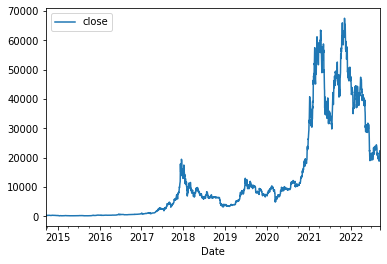

In [ ]:
btc.plot.line(y="close", use_index=True)

In [24]:
from google.colab import files
uploaded=files.upload()

Saving wikipedia_edits.csv to wikipedia_edits (1).csv


In [25]:
wiki=pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [26]:
wiki

,edit_count,editor_count,ratio,difference,sentiment,neg_sentiment,total_difference
2009-04-06,0.133333,0.066667,4.408755,4.633333,-0.032780,0.033333,18.533333
2009-04-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2022-09-03,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000
2022-09-04,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000
2022-09-05,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000
2022-09-06,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000


In [27]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [28]:
btc["tomorrow"] = btc["close"].shift(-1)

KeyError: ignored

In [20]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [21]:
btc["target"].value_counts()

1    1562
0    1351
Name: target, dtype: int64

In [35]:
btc

,open,high,low,close,volume,edit_count,editor_count,ratio,difference,sentiment,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,2.033333,0.001443,195.786653,-0.292484,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,2.066667,0.001479,200.703320,-0.293052,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,2.200000,0.001511,205.019987,-0.323301,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,2.200000,0.001528,207.386653,-0.292914,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,2.233333,0.000888,119.453320,-0.292836,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,23613051457,0.266667,0.200000,0.000092,20.588889,-0.092629,...,0.0,0.993802,0.276190,0.428571,0.899571,0.270000,0.433333,0.500381,0.890502,0.479452
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.266667,0.200000,0.000092,20.588889,-0.092629,...,0.5,0.998906,0.280952,0.571429,0.906969,0.263333,0.433333,0.505329,0.889863,0.482192
2022-09-05,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.266667,0.200000,0.000092,20.588889,-0.092629,...,0.5,0.993637,0.276190,0.428571,0.900301,0.257778,0.416667,0.502031,0.889224,0.479452
2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.266667,0.200000,0.000092,20.588889,-0.092629,...,0.0,0.951291,0.271429,0.428571,0.857889,0.252222,0.400000,0.478456,0.888584,0.476712


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [24]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4662576687116564

In [25]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [26]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [27]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [28]:
predictions["predictions"].value_counts()

1    1166
0     652
Name: predictions, dtype: int64

In [29]:
precision_score(predictions["target"], predictions["predictions"])

0.5128644939965694

In [30]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [31]:
btc, new_predictors = compute_rolling(btc.copy())

In [32]:
predictions = backtest(btc, model, new_predictors)

In [33]:
precision_score(predictions["target"], predictions["predictions"])

0.5300829875518672

In [34]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2022-09-03,1,1
2022-09-04,0,1
2022-09-05,0,1
2022-09-06,1,1
